<a href="https://colab.research.google.com/github/Tekleab15/Optimizing-Neural-Networks-Implementing-Dropout-and-Dictionary-Learning/blob/main/Optimizing_Neural_nets_with_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, SpatialDropout2D, Activation

In [24]:
def preprocess_data(train_dir, test_dir, target_size=(150, 150), batch_size=64):
    train_datagen = ImageDataGenerator(
        rescale=1./255, shear_range=0.2, zoom_range=0.2,
        horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical')

    test_generator = test_datagen.flow_from_directory(test_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical')

    return train_generator, test_generator

In [18]:
# Mount the google drive folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Preprocess the dataset
train_dir = '/content/drive/My Drive/Scene_dataset/seg_train/'
test_dir = '/content/drive/My Drive/Scene_dataset/seg_test/'
train_generator, test_generator = preprocess_data(train_dir, test_dir)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


**CNN Model Development without regularization **

In [26]:
# Define the model without dropout
model_no_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

In [27]:
model_no_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_no_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,036,742 (72.62 MB)

 Trainable params: 19,036,742 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Train the model
history_no_dropout = model_no_dropout.fit(train_generator, epochs=10,validation_data=test_generator)

Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 573s 3s/step - accuracy: 0.5262 - loss: 1.3335 - val_accuracy: 0.7427 - val_loss: 0.7408
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 568s 3s/step - accuracy: 0.7354 - loss: 0.7150 - val_accuracy: 0.7647 - val_loss: 0.6551
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 591s 3s/step - accuracy: 0.7904 - loss: 0.5718 - val_accuracy: 0.8093 - val_loss: 0.5498
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 570s 3s/step - accuracy: 0.8093 - loss: 0.5180 - val_accuracy: 0.8127 - val_loss: 0.5292
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 610s 3s/step - accuracy: 0.8326 - loss: 0.4545 - val_accuracy: 0.8120 - val_loss: 0.5223
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 567s 3s/step - accuracy: 0.8555 - loss: 0.4037 - val_accuracy: 0.8337 - val_loss: 0.4673
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 573s 3s/step - accuracy: 0.8731 - loss: 0.3577 - val_accuracy: 0.8447 - val_loss: 0.4607
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 564s 3s/step - accuracy: 0.8844 - loss: 0.3275 - val_accu

In [29]:
# Evaluate the model
test_loss_no_dropout, test_acc_no_dropout = model_no_dropout.evaluate(test_generator)
print(f'Test accuracy without dropout: {test_acc_no_dropout:.4f}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 721ms/step - accuracy: 0.8349 - loss: 0.5139
Test accuracy without dropout: 0.8543


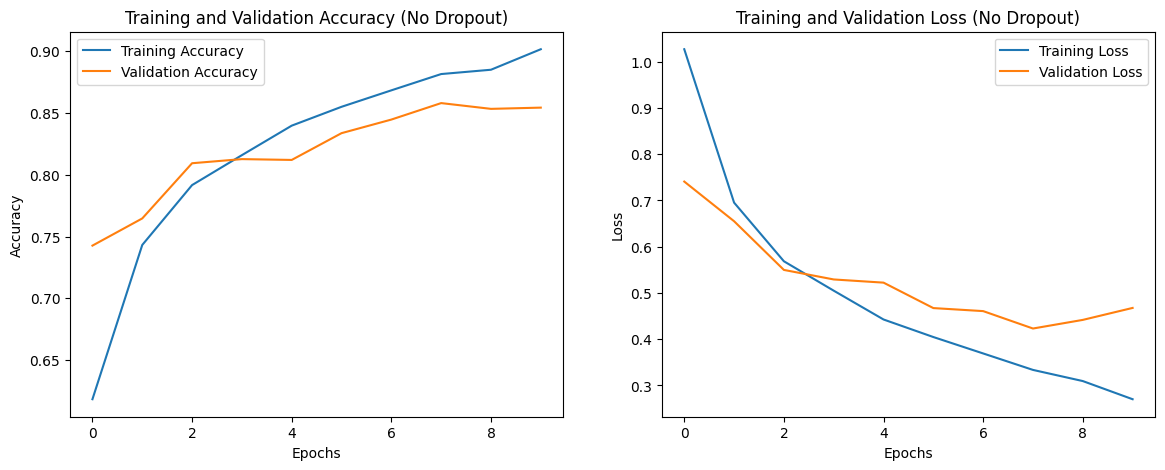

In [30]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_no_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (No Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_no_dropout.history['loss'], label='Training Loss')
plt.plot(history_no_dropout.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (No Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Develop the model Applying Dropouts**

In [43]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(150, 150, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    SpatialDropout2D(0.1),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])
# Compile the model with dropout
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_1                  │ (None, 74, 74, 32)          │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,036,870 (72.62 MB)

 Trainable params: 19,036,806 (72.62 MB)

 Non-trainable params: 64 (256.00 B)

**Train the model with Dropout**

In [44]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 687s 3s/step - accuracy: 0.4032 - loss: 3.5322 - val_accuracy: 0.5180 - val_loss: 1.4229
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 739s 3s/step - accuracy: 0.6019 - loss: 1.0325 - val_accuracy: 0.6373 - val_loss: 1.0824
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 682s 3s/step - accuracy: 0.6710 - loss: 0.8852 - val_accuracy: 0.6737 - val_loss: 0.9241
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 748s 3s/step - accuracy: 0.7326 - loss: 0.7464 - val_accuracy: 0.6597 - val_loss: 0.9645
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 682s 3s/step - accuracy: 0.7590 - loss: 0.6727 - val_accuracy: 0.7903 - val_loss: 0.6017
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 683s 3s/step - accuracy: 0.7797 - loss: 0.6133 - val_accuracy: 0.7157 - val_loss: 0.7525
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 689s 3s/step - accuracy: 0.7864 - loss: 0.6028 - val_accuracy: 0.8243 - val_loss: 0.5124
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 696s 3s/step - accuracy: 0.8006 - loss: 0.5651 - val_accu

In [45]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 793ms/step - accuracy: 0.8110 - loss: 0.5292
Test accuracy: 0.8063333630561829


**Visualize the training and Validation process **

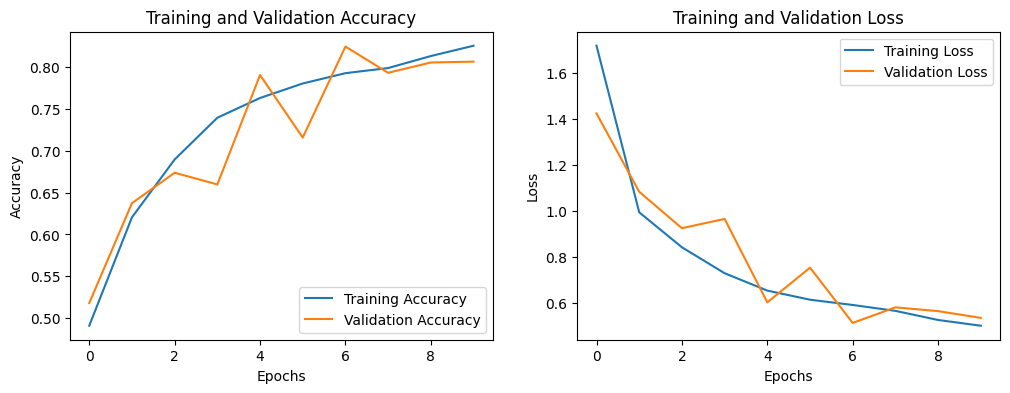

In [46]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## **Test Accuracy of the two models**

In [48]:
print(f'Test accuracy with dropout: {test_acc_no_dropout:.4f}')
print(f'Test accuracy without dropout: {test_acc:.4f}')

Test accuracy with dropout: 0.8543
Test accuracy without dropout: 0.8063


Analysis:
Overfitting Reduction: The model with dropout should show a reduced gap between training and validation accuracy, indicating less overfitting.

Generalization Improvement: A higher validation and test accuracy in the model with dropout suggests better generalization to new data.